## Data visualization

Python is a very powerful tool to generate any kind of figures, from the most simple to very complex examples.

As with many other tools nowadays, generating *a figure* is a straightforward process that can be attained in a couple of lines of code. However, getting nice, production-ready images does often take more time, effort, and code.

The main backend for graphics in Python is **Matplotlib**, which defines all the core elements for working with figures in Python. Having a grasp of these elements is essential to properly control image production via code, even if additional libraries are used to streamline the procedure.

Along this lesson, we will not only tackle Matplotlib, but also present **Seaborn**, a frequently used library which allows to generate more polished figures from tabular data (in DataFrames) very easily.




In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Matplotlib 101
We will go through the main elements of Matplotlib, and how they can be tweaked to go from a basic figure to a nicer result

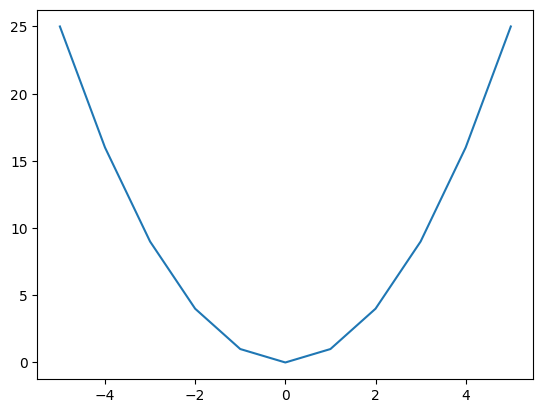

In [2]:
# Create a Figure and add an Axis to it, to build the canvas
fig = plt.figure()
ax = fig.add_subplot()

### Simple line plot: x and y values. Start with a parabola y = x**2 
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y = x**2

ax.plot(x,y)

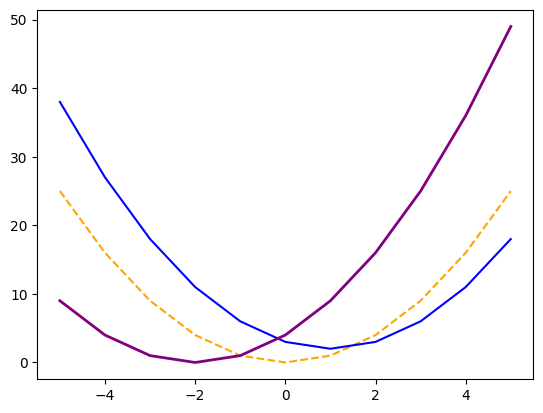

In [3]:
# Multiple plots can be put in the same Axis: for example, shifted parabolas and y = x**3

fig = plt.figure()
ax = fig.add_subplot()

### Simple line plot: x and y values. Start with a parabola y = x**2 and shift it
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y1 = x**2
y2 = (x-1)**2 + 2
y3 = (x+2)**2 

# we can also choose the colors and the general appearance

ax.plot(x,y1,color="orange",linestyle="--")
ax.plot(x,y2,color="blue")
ax.plot(x,y3,color="purple",linewidth=2)

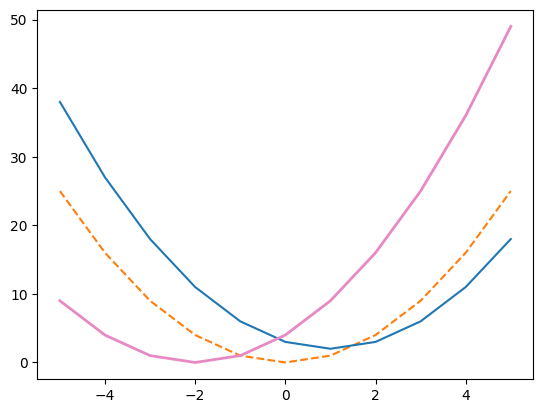

In [4]:
# Somehow nicer colors can be directly obtained through the tab: variants
# Custom colors can be used with the corresponding hex codes. Recommended to have a nice, consistent palette 
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x,y1,color="tab:orange",linestyle="--")
ax.plot(x,y2,color="tab:blue")
ax.plot(x,y3,color="#e78ac3",linewidth=2)

About colors: apart from the "normal" names, the tab variants and the custom hex codes, there is a large list of available
pre-named shades. Check the documentation!

**CSS colors from Matplotlib - use as cheatsheet:**

<img src="images/matplotlib_colors_css.webp" width=750>

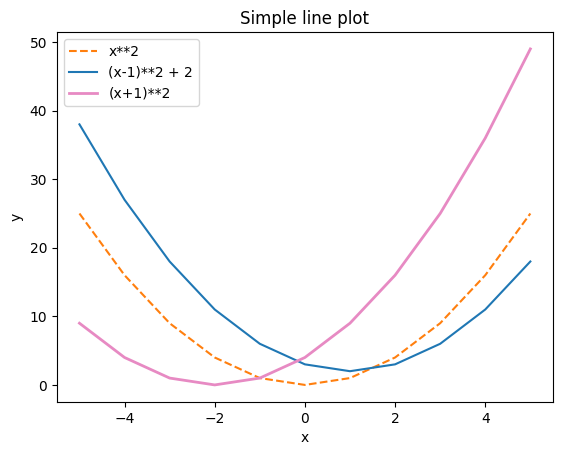

In [5]:
# Also, add important elements: labels for axes, title, and legend
fig = plt.figure()
ax = fig.add_subplot()

# include label= field for the legend

ax.plot(x,y1,color="tab:orange",label="x**2",linestyle="--")
ax.plot(x,y2,color="tab:blue",label="(x-1)**2 + 2")
ax.plot(x,y3,color="#e78ac3",linewidth=2,label="(x+1)**2")

# Other elements such as titles are added AFTER the figure has been created
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Simple line plot")
ax.legend()

(0.0, 6.0)

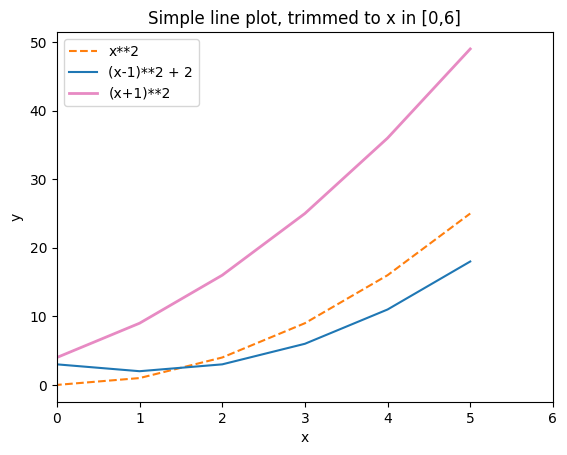

In [6]:
# We can also change the range of the axes

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x,y1,color="tab:orange",label="x**2",linestyle="--")
ax.plot(x,y2,color="tab:blue",label="(x-1)**2 + 2")
ax.plot(x,y3,color="#e78ac3",linewidth=2,label="(x+1)**2")

# Other elements such as titles are added AFTER the figure has been created
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Simple line plot, trimmed to x in [0,6]")
ax.legend()

ax.set_xlim([0,6])

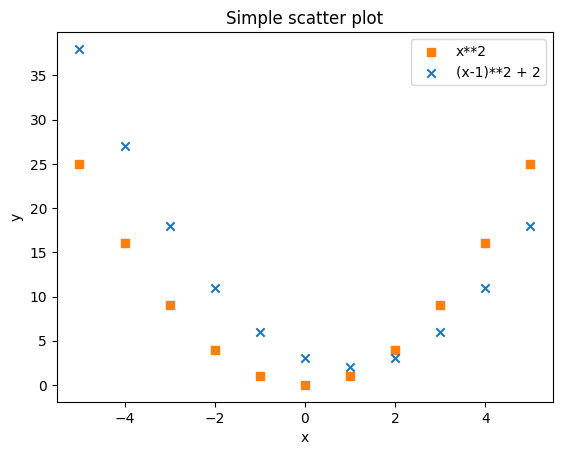

In [7]:
# There are more plot types: instead of lines, use a scatterplot with points

fig = plt.figure()
ax = fig.add_subplot()

# We can control the markers: look at the docs for correspondences
# o (or by default) is a circle, x is a cross, s is a square

ax.scatter(x,y1,color="tab:orange",label="x**2",marker="s")
ax.scatter(x,y2,color="tab:blue",label="(x-1)**2 + 2",marker="x")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Simple scatter plot")
ax.legend()

Text(0.5, 0.98, '1x2 layout')

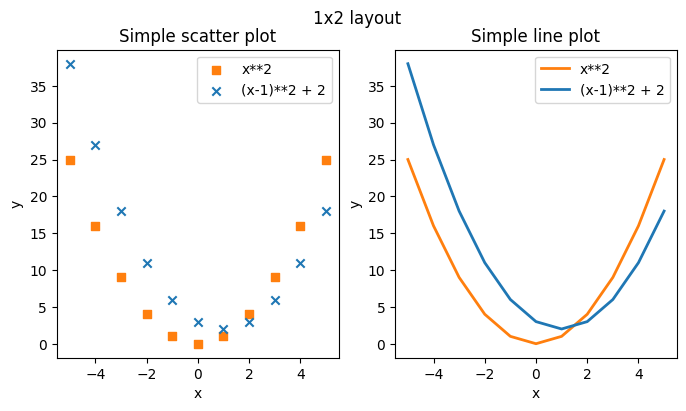

In [8]:
# It is also possible to create layouts where multiple plots are brought together
# Layouts are generated as arrays of size Nrows,Ncols
# An each individual axis is accessed by ax[i,j]

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(x,y1,color="tab:orange",label="x**2",marker="s")
ax[0].scatter(x,y2,color="tab:blue",label="(x-1)**2 + 2",marker="x")

ax[1].plot(x,y1,color="tab:orange",label="x**2",linewidth=2)
ax[1].plot(x,y2,color="tab:blue",label="(x-1)**2 + 2",linewidth=2)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Simple scatter plot")

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Simple line plot")

ax[0].legend()
ax[1].legend()

# Also, we can put a general title
fig.suptitle("1x2 layout")

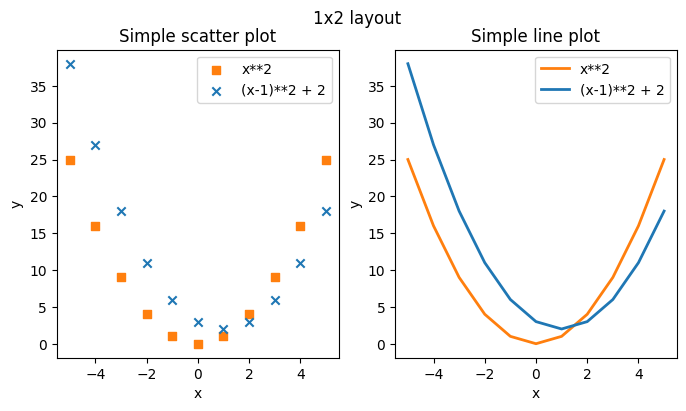

In [9]:
# Figures can be saved in multiple formats, but recommendations would be PNG (good quality, compatible
# with almost everything, not too large, preferred by many journals) and SVG (vectorial, unlimited 
# zooming and editing outside Python)
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(x,y1,color="tab:orange",label="x**2",marker="s")
ax[0].scatter(x,y2,color="tab:blue",label="(x-1)**2 + 2",marker="x")

ax[1].plot(x,y1,color="tab:orange",label="x**2",linewidth=2)
ax[1].plot(x,y2,color="tab:blue",label="(x-1)**2 + 2",linewidth=2)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Simple scatter plot")

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Simple line plot")

ax[0].legend()
ax[1].legend()

fig.suptitle("1x2 layout")

plt.savefig("TestScatterplot.png",dpi=300)
plt.savefig("TestScatterplot.svg")

Text(0.5, 0.98, 'Shifted parabolas')

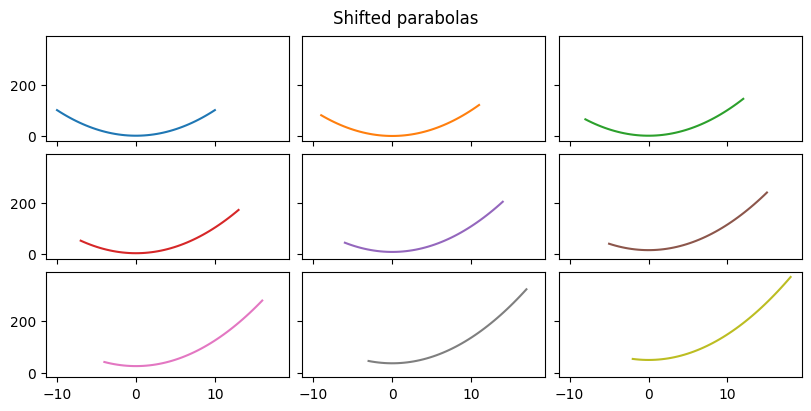

In [10]:
# Layouts can be more complex: however, we will have an array of Axes that will have to be accessed
# with multiple indices. If we use the .flatten() method, however, we will have a 1D array, which
# can be easier to work with

# Also, we can share axes between subplots
fig,axes = plt.subplots(3,3,figsize=(8,4),constrained_layout=True,
                       sharex=True,sharey=True)
ax = axes.flatten()

# A list of RGB colors from tab10 colormap
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
              '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for ii in range(9):
    # create data for the visualization
    x_test = np.linspace(-10,10,50) + ii
    y_test = x_test**2 + (ii-1)**2

    
    # to use the original 2D array, we will need to transform this ii
    # to an index -> the flattened array is easier
    ax[ii].plot(x_test,y_test,color=color_list[ii])

fig.suptitle("Shifted parabolas")

**Exercise**: plot a sine and a cosine function, adding a legend for each. Choose non-default colors and make the lines thicker.

Put appropiate x- and y- labels, and also a title.

In [11]:
### Data
x_angles = np.linspace(-2*np.pi,2*np.pi,50)
y_sin = np.sin(x_angles)
y_cos = np.cos(x_angles)

**Exercise**: plot a linear regression, including the points (as a scatterplot) and the trend line (as a line plot).

*Hint*. If we have a equation (in this case, y=mx+n) we want to plot together with some data points, it is advisable to sample enough *x* points in the same range as the points (using `np.linspace` with the correct range), and then employ the equation to compute *y*.

In [12]:
### Data
x_points = np.array([0,2,2.5,4,6,7,10])
y_points = np.array([-2.5,1.1,2.5,4,8.8,13,16])

m = 1.9453
n = -2.6254

x_sample = np.linspace(0,10,100)

# Use this to draw the trend line y = mx + n



## Matplotlib 102: actual data
Of course, we can also do plots on more complex data, such as DataFrames (e.g. information extracted from an experiment or simulation).

Let us consider a dataset about physicochemical properties of wines:


In [13]:
### Physicochemical properties of wines
data = pd.read_csv("datasets/wine-quality-white-and-red.csv")
display(data)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Text(0.5, 1.0, 'Wine data')

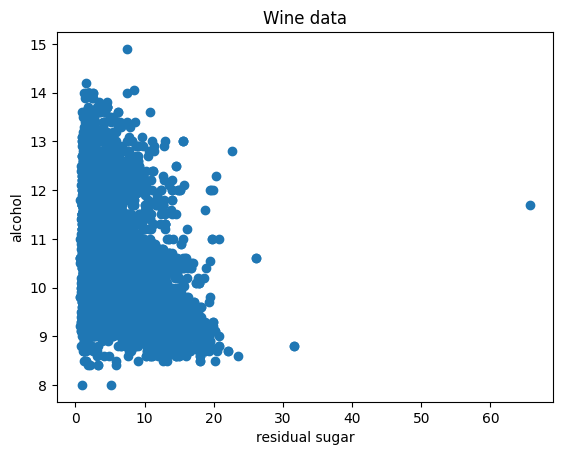

In [14]:
# We may plot the residual sugar against the alcohol content.
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(data.loc[:,"residual sugar"],data.loc[:,"alcohol"])

# All is added AFTER the figure

ax.set_xlabel("residual sugar")
ax.set_ylabel("alcohol")
ax.set_title("Wine data")


<Axes: xlabel='residual sugar', ylabel='alcohol'>

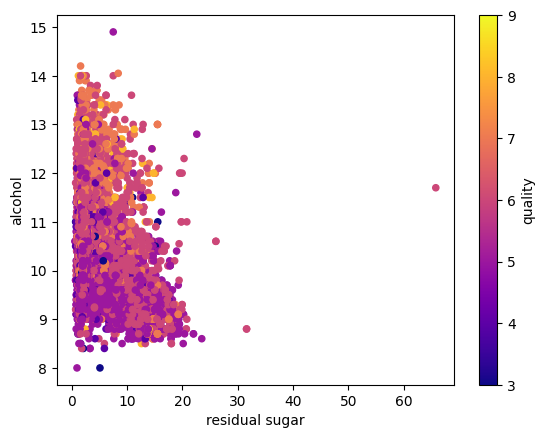

In [15]:
# If we have DataFrames, we can also directly plot from the DF, only needing to specify
# the names of the columns to plot

# Also, we may color points according to other numeric variable in the same DataFrame: e.g. the quality

fig = plt.figure()
ax = fig.add_subplot()

data.plot.scatter("residual sugar","alcohol",c="quality",ax=ax,cmap="plasma")

**Colormaps** allow to map numeric properties to colors, and are essential for quantitative visualization.

Many possibilities exist - a generally good option is to use **perceptually uniform** maps, where the color change we perceive is
proportional to the actual change in data. This is of course complex - color perception depends on the individual, there are colorblind people
with different kinds of colorblindness (though some colormaps are colorblind-friendly), etc.

Look at the docs: [Colormap choice in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps)

**Examples of perceptually uniform colormaps:**

<img src="images/matplotlib_colormaps_1.webp" width=750>

From these, *viridis* (yellow/green/blue/purple) is quite a standard for data science and usually looks nice enough.

## Seaborn
Beyond Matplotlib, the seaborn library is another alternative for scientific plotting.

Seaborn is very adapted to the Pandas ecosystem, and is better for working with DataFrames. In general, out-of-the-box it provides better overall look and some very powerful built-in features. For instance, it allows to automatically use categorical variables in the DataFrame to group elements in the plot and assign different colors and/or markers, which can be really useful in the visualization of complex datasets. From the point of view of convenience, seaborn plots also include automatic axis naming, legends... 

Nonetheless, these plots are also less customizable, and can be a bit cumbersome to work with if the plot "drifts" from the core functionalities in seaborn. In general, if something looks to difficult to tweak using seaborn, it is advisable to either think about using Matplotlib instead or modifying by-hand in an image editor.


<Axes: xlabel='residual sugar', ylabel='alcohol'>

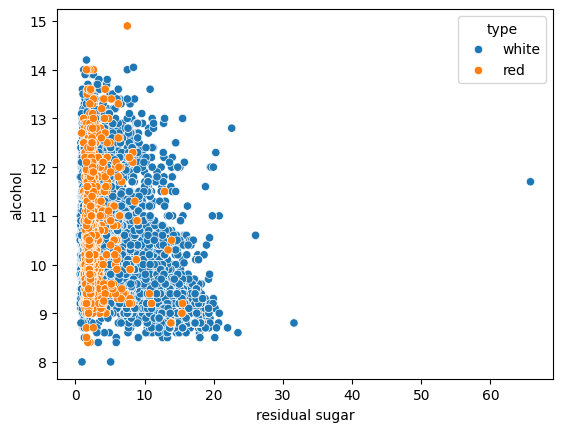

In [16]:
# Plot for sugar and alcohol in wines, using the categorical variable type (red or white) to group
# values automatically.

# We can first define the figure and axis, and then pass the ax argument to the Seaborn plotter function to
# put the plot in the desired axis (useful for putting figures in layouts). If we just call the function,
# most will return an Axes object

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(data=data,x="residual sugar",y="alcohol",ax=ax,hue="type")


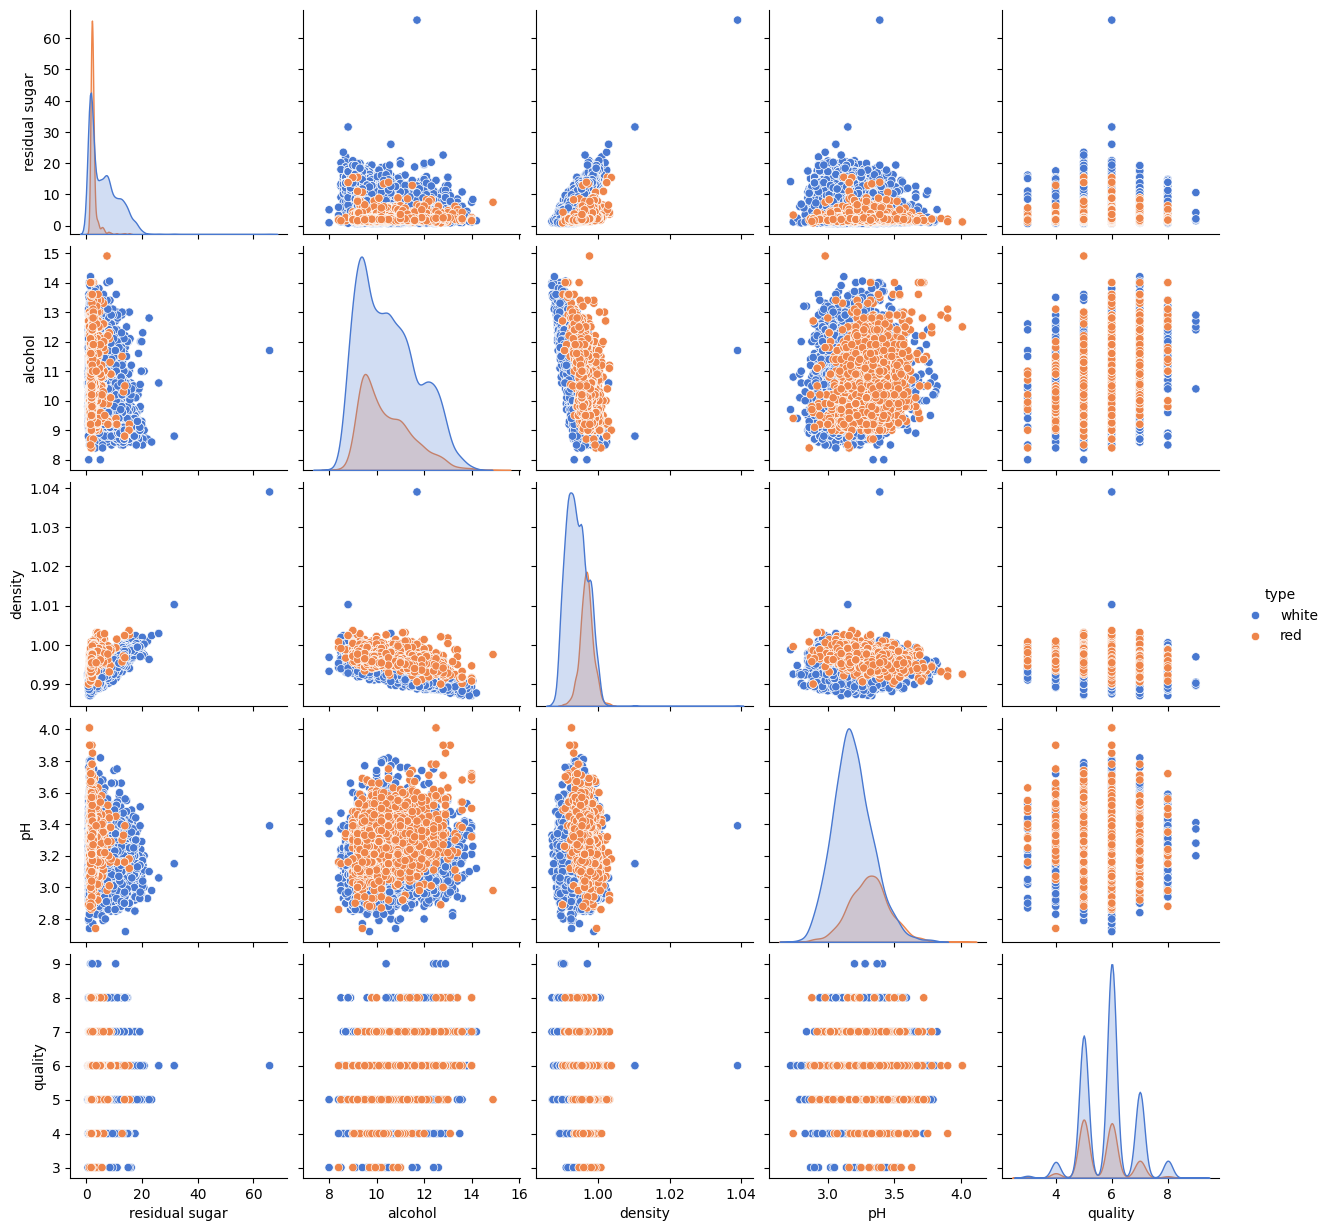

In [17]:
# Seaborn includes multiple complex plots, such as the pairplot, that considers all columns in a
# DataFrame to plot all possible X/Y combinations. Cells where a variable is plotted against itself 
# are shown as density plots, providing an immediate idea on the distribution of the variable
sel4 = data.loc[:,["type","residual sugar","alcohol","density","pH","quality"]]
sns.pairplot(sel4,hue="type",palette="muted")

#### Histograms
Plots of a univariate data distribution, essential to work with medium to large quantitative datasets in order to know how the values behave.

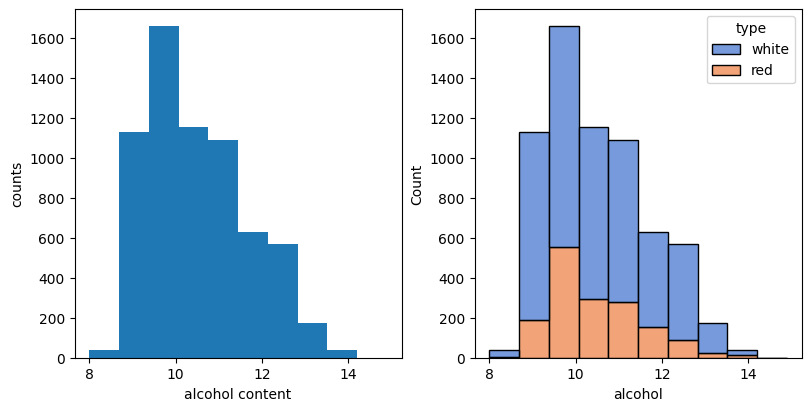

In [18]:
# Use either Matplotlib (more control) or Seaborn (more out-of-the-box functionalities)
fig,ax = plt.subplots(1,2,figsize=(8,4),constrained_layout=True)

hist1 = ax[0].hist(data["alcohol"],color="tab:blue")
ax[0].set_xlabel("alcohol content")
ax[0].set_ylabel("counts")
hist2 = sns.histplot(data=data,x="alcohol",hue="type",
                     ax=ax[1],bins=10,palette="muted",
                     multiple="stack")


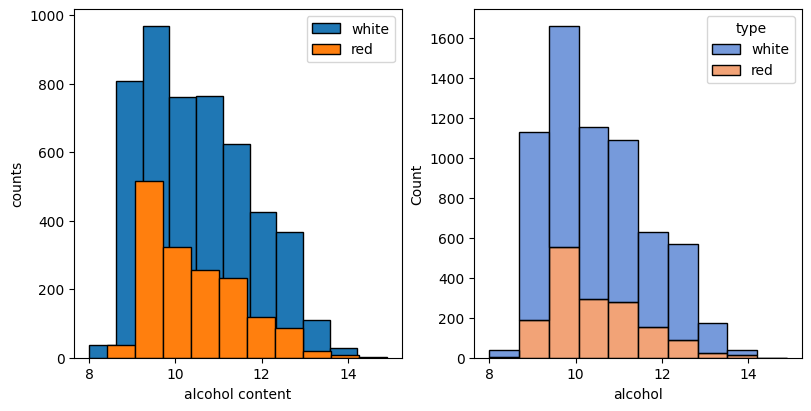

In [19]:
# To do the same with Matplotlib, we should go through categories separately: loop or groupby
fig,ax = plt.subplots(1,2,figsize=(8,4),constrained_layout=True)
wine_types = data.loc[:,"type"].unique()
for typ in wine_types:
    sel = data[data.loc[:,"type"] == typ]
    ax[0].hist(sel["alcohol"],label=typ,linewidth=1,edgecolor="black")
ax[0].set_xlabel("alcohol content")
ax[0].set_ylabel("counts")
ax[0].legend()
hist2 = sns.histplot(data=data,x="alcohol",hue="type",
                     ax=ax[1],bins=10,palette="muted",hue_order=("white","red"),
                    multiple="stack")


#### Box-and-whisker plots
Quick statistical assessment of a given variable: median, 25% and 75% quartiles, limits of statistical confidence (exceeding a given distance from the interquartile range - e.g. 1.5 IQR) and outlier identification

<Axes: xlabel='quality', ylabel='alcohol'>

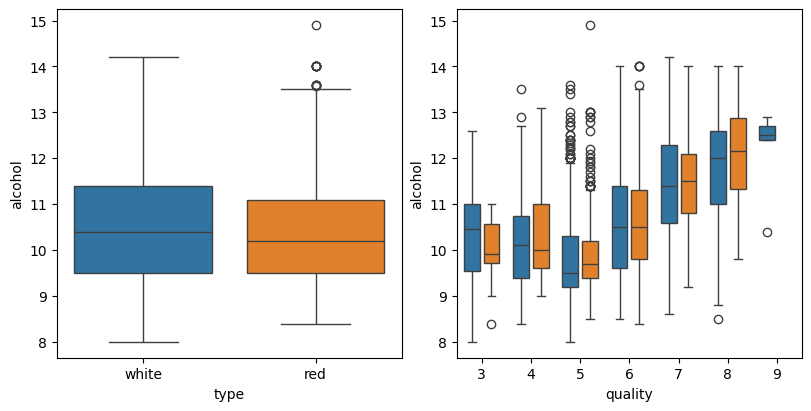

In [20]:
fig,ax = plt.subplots(1,2,figsize=(8,4),constrained_layout=True)
sns.boxplot(data=data,x="type",y="alcohol",hue="type",ax=ax[0])
sns.boxplot(data=data,x="quality",y="alcohol",hue="type",ax=ax[1],gap=0.2,legend=False)

#### Heatmaps
Representation of matrix-like data. There are two categorical axes (X and Y): each value in the matrix corresponds to a numerical property (e.g. cross-tables and pivot tables). The numeric values are represented with a color scale, giving an immediate idea of their magnitudes: specific numbers can also be included.

Very useful for high-throughput data, either for experiments or for simulations.

#### A digression on multi-grouping and pivot tables

A pivot table is a *matrix*, where the X and Y axes correspond to two different categories, and the numeric values, to the *aggregation* of a given quantitative variable.

<img src='images/df_pivot.png' width=450>

For instance, in the wines dataset, we could consider the *type* of wine (white/red) as one category, and the *quality* as the other, as seen in the visualizations. We would then have these "buckets" for all of our numeric variables (residual sugar, alcohol content...)
- Quality 3, white wine
- Quality 3, red wine
- Quality 4, white wine
- Quality 4, red wine

and so on.

Then, the pivot table would contain the *mean* values of the target numeric variable (i.e., the alcohol content) for each bucket.


In [74]:
table_wines = pd.pivot_table(data=data,index="type",columns="quality",values="alcohol")
display(table_wines)

quality,3,4,5,6,7,8,9
type,,,,,,,
red,9.955,10.265094,9.899706,10.629519,11.465913,12.094444,NaN
white,10.345,10.152454,9.808840,10.575372,11.367936,11.636000,12.18


In [22]:
# A quantitative example for chemistry -> yields
exp_data = pd.read_csv("datasets/exp_data_example.dat")
print("Data table:")
display(exp_data)

# Using a pivot table -> select a data property and organize it by two categories
# In this case, the property is the yield, and we will group it according to temperature and substituents
tab3 = pd.pivot_table(data=exp_data,index="temp",columns="subst",values="yield")
print("Pivot table:")
display(tab3)

# This uses an aggregation function - by default, the MEAN (but we have only a single measurement per bucket here)



Data table:


,subst,temp,yield
0,R1,20,30
1,R1,45,68
2,R1,80,99
3,R2,20,3
4,R2,45,41
5,R2,80,75
6,R3,20,70
7,R3,45,99
8,R3,80,99


Pivot table:


subst,R1,R2,R3
temp,,,
20,30.0,3.0,70.0
45,68.0,41.0,99.0
80,99.0,75.0,99.0


Text(0.5, 1.0, 'Experimental yields')

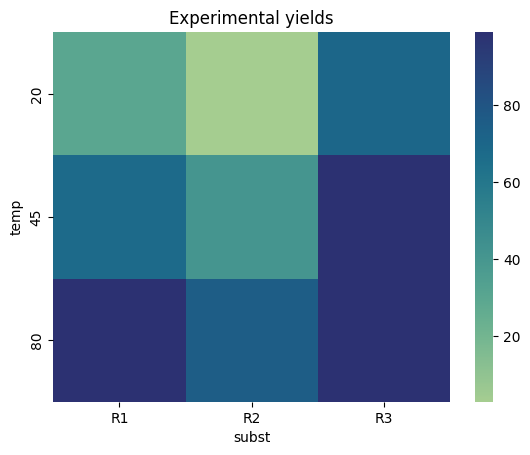

In [27]:
# And from here, the heatmap is the natural representation -> the coloring here
# helps to immediately locate "relevant" regions, which can be very relevant for larger tables
ax = sns.heatmap(tab3,cmap="crest")
ax.set_title("Experimental yields")

Text(0.5, 1.0, 'Experimental yields')

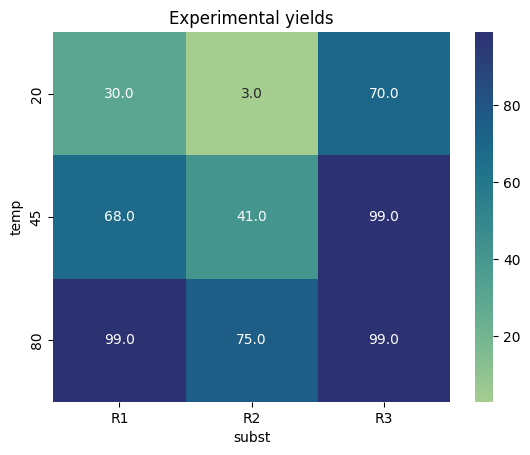

In [34]:
# It will be more helpful to include the actual values in the table
# via the annot=True argument
ax = sns.heatmap(tab3,annot=True,fmt=".1f",cmap="crest")
ax.set_title("Experimental yields")

A note on colors: Seaborn distributes different colormaps than Matplotlib : [Colormaps in Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

*crest* is somehow similar to *viridis*, but without the extremes (bright yellow and deep purple). This more subtle shade can be 
adequate for heatmaps, where extreme observations might feel too harsh with other colormap - again, it is advisable to check the docs and explore the options to have the best visualization possible.


Text(0.5, 1.0, 'Experimental yields')

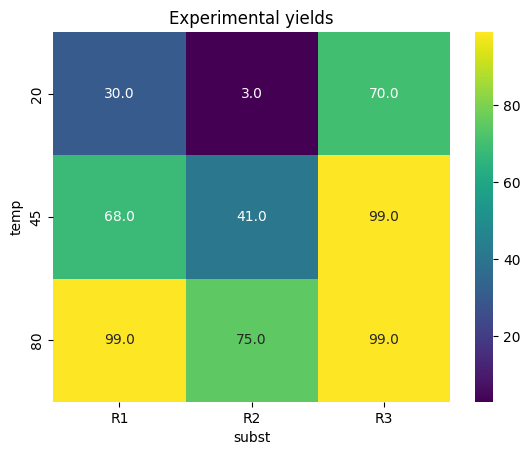

In [36]:
# Bright yellow from viridis can be grating here:
ax = sns.heatmap(tab3,annot=True,fmt=".1f",cmap="viridis")
ax.set_title("Experimental yields")

In [29]:
# A qualitative example for science and its metrics: Nobel awardees in history
sel_nobel = pd.read_csv("datasets/nobel_prizes_prepared.csv")
display(sel_nobel)

,awardYear,gender,birth_continent,category,awardDecade
0,2001,male,North America,Economic Sciences,2000
1,1975,male,Europe,Physics,1970
2,2004,male,Asia,Chemistry,2000
3,1982,male,Europe,Chemistry,1980
4,1979,male,Asia,Physics,1970
...,...,...,...,...,...
918,2000,male,Europe,Physics,2000
919,1980,male,Europe,Chemistry,1980
920,1972,male,North America,Physics,1970
921,1954,male,North America,Chemistry,1950


In [30]:
# Nobel prize dataset: geographical distribution by category

# Cross tables (pd.crosstab) enable us to get counts for two distinct categories -> here, we might
# consider the prize category and the awardee's birth continent

table = pd.crosstab(sel_nobel.loc[:,"category"],sel_nobel.loc[:,"birth_continent"])
display(table)


birth_continent,Africa,Asia,Europe,North America,Oceania,South America
category,,,,,,
Chemistry,3,16,103,59,3,0
Economic Sciences,0,3,30,51,0,0
Literature,6,10,80,16,0,4
Peace,13,13,53,23,2,3
Physics,2,20,114,75,2,0
Physiology or Medicine,3,10,114,80,8,4


Text(0.5, 1.0, 'Continental breakdown')

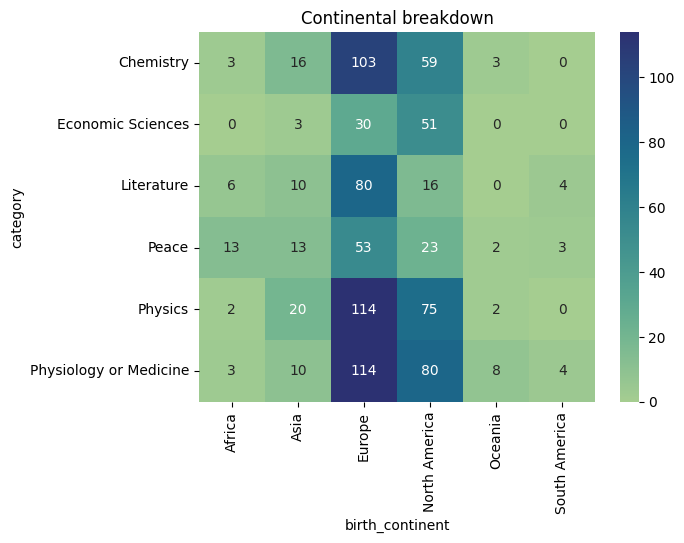

In [30]:
# And this can be immediately translated to a visualization, using sns.heatmap
ax = sns.heatmap(table,cmap="crest",annot=True,fmt='d')
# And we can then modify the returned Axes object, using the methods from Matplotlib
ax.set_title("Continental breakdown")

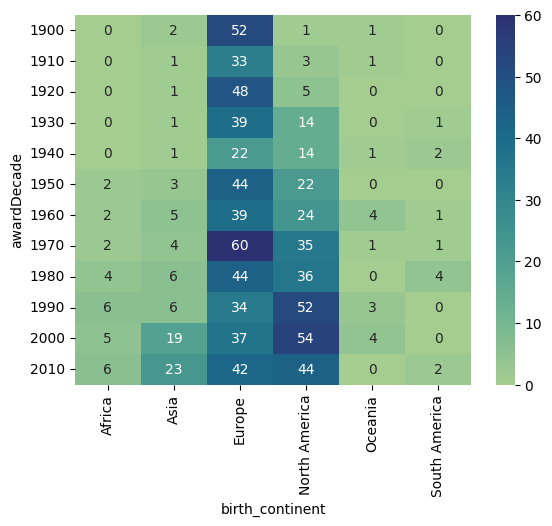

In [31]:
# We can do the same with decade and continent, to see time evolution
table2 = pd.crosstab(sel_nobel.loc[:,"awardDecade"],sel_nobel.loc[:,"birth_continent"])
ax = sns.heatmap(table2,cmap="crest",annot=True,fmt='d')


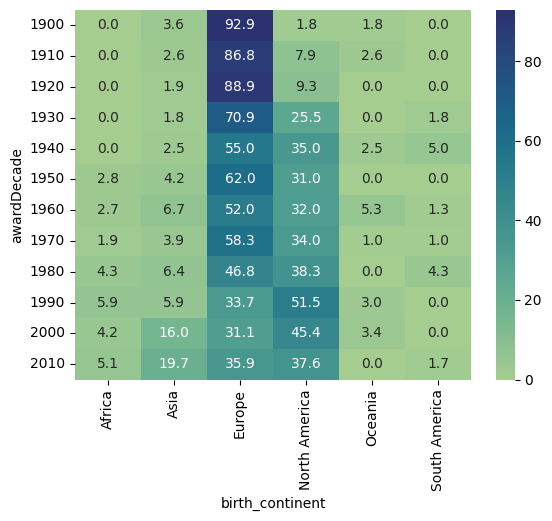

In [33]:
# For clarity, this will be nicer if we compute percentages per decade, with a small data manipulation
# Get the total number of entries per decade (sum all columns for each row)
# Then divide each column by the sum and multiply by 100
counts = table2.sum(axis="columns")
table3 = table2.div(counts,axis="rows") * 100
ax = sns.heatmap(table3,cmap="crest",annot=True,fmt='.1f')

**Exercise**: build a similar visualization, but replacing the continent breakdown by a gender breakdown.

### Deciding visualizations
The previous exercise shows a heatmap where one of the variables only shows two factor

- Is this really informative?
- Would there be better ways to showcase this information?

In [45]:
# A more interesting visualization here would be to have line plots on the gap between males and females
# to have better insights on time evolution 
table5 = pd.crosstab(sel_nobel.loc[:,"awardDecade"],sel_nobel.loc[:,"gender"]).reset_index()
# reset_index will allow us to properly plot the decade
display(table5)
table5.loc[:,"gap"] = (table5.loc[:,"male"] - table5.loc[:,"female"])
display(table5)


gender,awardDecade,female,male
0,1900,3,53
1,1910,1,37
2,1920,2,52
3,1930,3,52
4,1940,3,37
5,1950,0,71
6,1960,3,72
7,1970,4,99
8,1980,4,90
9,1990,7,94


gender,awardDecade,female,male,gap
0,1900,3,53,50
1,1910,1,37,36
2,1920,2,52,50
3,1930,3,52,49
4,1940,3,37,34
5,1950,0,71,71
6,1960,3,72,69
7,1970,4,99,95
8,1980,4,90,86
9,1990,7,94,87


Text(0, 0.5, 'Gap between female and male awardees')

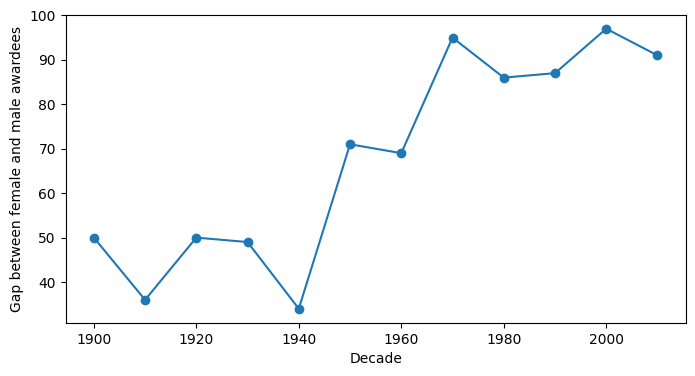

In [46]:
# Consider the plot and scatter seen before

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

ax.plot(table5["awardDecade"],table5["gap"])
ax.scatter(table5["awardDecade"],table5["gap"])

### Add ax titles
ax.set_xlabel("Decade")
ax.set_ylabel("Gap between female and male awardees")


gender,awardDecade,female,male,gap,total,female_perc
0,1900,3,53,50,56,5.357143
1,1910,1,37,36,38,2.631579
2,1920,2,52,50,54,3.703704
3,1930,3,52,49,55,5.454545
4,1940,3,37,34,40,7.500000
5,1950,0,71,71,71,0.000000
6,1960,3,72,69,75,4.000000
7,1970,4,99,95,103,3.883495
8,1980,4,90,86,94,4.255319
9,1990,7,94,87,101,6.930693


Text(0, 0.5, 'Percentage of female awardees')

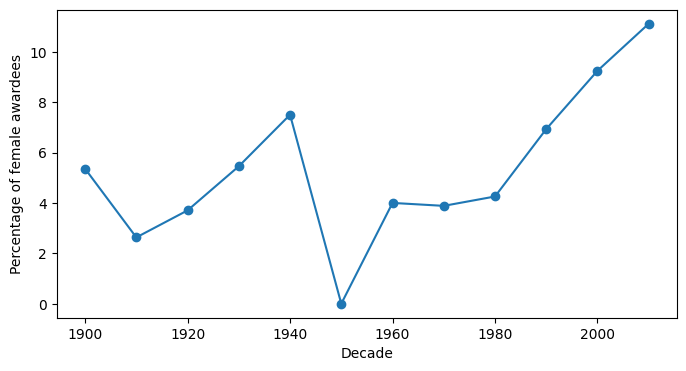

In [49]:
# This can be misleading, because we are considering absolute numbers -> like before, get the percentage
# of either male or female awardees
table5.loc[:,"count"] = table5["male"] + table5["female"]
table5.loc[:,"female_perc"] = table5["female"] / table5["count"] * 100
display(table5)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

ax.plot(table5["awardDecade"],table5["female_perc"])
ax.scatter(table5["awardDecade"],table5["female_perc"])

### Add ax titles
ax.set_xlabel("Decade")
ax.set_ylabel("Percentage of female awardees")


An obvious question as this point: does the gender breakdown vary with category?

From the plotting point of view, we could have multiple % Female awardees vs. Decade plots for each category

In [31]:
# To break this down by category, the simplest (though not cleanest) approach could be a for loop, selecting the
# DataFrame slices for each of the groups
# First explore the data, then plot

categories = sel_nobel.loc[:,"category"].unique()
print(categories)

for cat in categories:
    sel_cat = sel_nobel[sel_nobel["category"] == cat]
    tablex = pd.crosstab(sel_cat.loc[:,"awardDecade"],sel_cat.loc[:,"gender"]).reset_index()
    tablex.loc[:,"count"] = (tablex.loc[:,"male"] + tablex.loc[:,"female"])
    tablex.loc[:,"female_perc"] = (tablex.loc[:,"female"]/tablex.loc[:,"count"]) * 100

    print(cat)
    display(tablex)



['Economic Sciences' 'Physics' 'Chemistry' 'Peace'
 'Physiology or Medicine' 'Literature']
Economic Sciences


gender,awardDecade,female,male,count,female_perc
0,1960,0,2,2,0.0
1,1970,0,15,15,0.0
2,1980,0,10,10,0.0
3,1990,0,17,17,0.0
4,2000,1,19,20,5.0
5,2010,1,19,20,5.0


Physics


gender,awardDecade,female,male,count,female_perc
0,1900,1,12,13,7.692308
1,1910,0,10,10,0.000000
2,1920,0,12,12,0.000000
3,1930,0,11,11,0.000000
4,1940,0,7,7,0.000000
5,1950,0,20,20,0.000000
6,1960,1,16,17,5.882353
7,1970,0,25,25,0.000000
8,1980,0,22,22,0.000000
9,1990,0,22,22,0.000000


Chemistry


gender,awardDecade,female,male,count,female_perc
0,1900,0,9,9,0.000000
1,1910,1,7,8,12.500000
2,1920,0,10,10,0.000000
3,1930,1,12,13,7.692308
4,1940,0,9,9,0.000000
5,1950,0,14,14,0.000000
6,1960,1,14,15,6.666667
7,1970,0,15,15,0.000000
8,1980,0,21,21,0.000000
9,1990,0,18,18,0.000000


Peace


gender,awardDecade,female,male,count,female_perc
0,1900,1,12,13,7.692308
1,1910,0,5,5,0.000000
2,1920,0,11,11,0.000000
3,1930,1,7,8,12.500000
4,1940,1,3,4,25.000000
5,1950,0,7,7,0.000000
6,1960,0,5,5,0.000000
7,1970,3,9,12,25.000000
8,1980,1,7,8,12.500000
9,1990,3,11,14,21.428571


Physiology or Medicine


gender,awardDecade,female,male,count,female_perc
0,1900,0,11,11,0.000000
1,1910,0,6,6,0.000000
2,1920,0,11,11,0.000000
3,1930,0,14,14,0.000000
4,1940,1,13,14,7.142857
5,1950,0,20,20,0.000000
6,1960,0,25,25,0.000000
7,1970,1,24,25,4.000000
8,1980,3,20,23,13.043478
9,1990,1,19,20,5.000000


Literature


gender,awardDecade,female,male,count,female_perc
0,1900,1,9,10,10.000000
1,1910,0,9,9,0.000000
2,1920,2,8,10,20.000000
3,1930,1,8,9,11.111111
4,1940,1,5,6,16.666667
5,1950,0,10,10,0.000000
6,1960,1,10,11,9.090909
7,1970,0,11,11,0.000000
8,1980,0,10,10,0.000000
9,1990,3,7,10,30.000000


Text(0, 0.5, '% of female awardees')

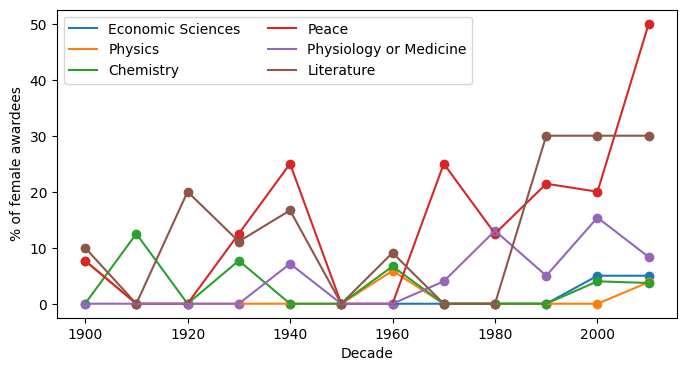

In [54]:
# Actual plotting
categories = sel_nobel.loc[:,"category"].unique()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
for cat in categories:
    sel_cat = sel_nobel[sel_nobel["category"] == cat]
    tablex = pd.crosstab(sel_cat.loc[:,"awardDecade"],sel_cat.loc[:,"gender"]).reset_index()
    tablex.loc[:,"count"] = (tablex.loc[:,"male"] + tablex.loc[:,"female"])
    tablex.loc[:,"female_perc"] = (tablex.loc[:,"female"]/tablex.loc[:,"count"]) * 100
    
    ax.plot(tablex["awardDecade"],tablex["female_perc"],label=cat)
    ax.scatter(tablex["awardDecade"],tablex["female_perc"])
ax.legend(ncols=2)

### Add ax titles
ax.set_xlabel("Decade")
ax.set_ylabel("% of female awardees")



### Application example
Set up a plot layout containing important results of the wines' dataset: we will consider the properties related to the acidity of the wine

- Scatter plot: citric acid content vs. pH, colored by the *fixed acidity* of each point
- Box-and-whisker plot: citric acid content for each *quality*
- Heatmap: mean fixed acidity for each quality and type
- Histogram: volatile acidity, grouped by type

Add reasonable titles and axis labels to every plot

Tips:
- A 2x2 layout will be convenient -> recall that `ax = axes.flatten()` simplifies the access to the layout (0 - top left, 1 - top right, 2 - bottom left, 3 - bottom right).
- For Seaborn's plots, if the result is being added to a specific *Axes* element, you should pass the corresponding `ax = ax[i]` argument for the i-th element in the layout.
- The heatmap requires a pivot table to be computed
- Use the `constrained_layout=True` instruction when generating the layout for a better distribution.